In [ ]:
!pip install geojson

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import matplotlib.dates as mdates
import locale
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from urllib.request import urlopen
import json
import geojson
import warnings

In [2]:
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# renderers en png pour notebook, car assez gourmand avec le contenu complet
pio.renderers.default="png"
warnings.filterwarnings("ignore")

<h3>Données foncières 2022</h3>

In [3]:
data_2022=pd.read_csv("./data/valeursfoncieres-2022.txt", sep="|", decimal=",")

<h3>Exploration, prétraitement 2022</h3>

In [4]:
data_2022.columns

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [5]:
data_2022.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.000,Appartement,NaN,24.000,1.000,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84.000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88.000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.000,Appartement,NaN,140.000,3.000,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510.000


In [6]:
data_2022.dtypes

Identifiant de document       float64
Reference document            float64
1 Articles CGI                float64
2 Articles CGI                float64
3 Articles CGI                float64
4 Articles CGI                float64
5 Articles CGI                float64
No disposition                  int64
Date mutation                  object
Nature mutation                object
Valeur fonciere               float64
No voie                       float64
B/T/Q                          object
Type de voie                   object
Code voie                      object
Voie                           object
Code postal                   float64
Commune                        object
Code departement               object
Code commune                    int64
Prefixe de section            float64
Section                        object
No plan                         int64
No Volume                      object
1er lot                        object
Surface Carrez du 1er lot     float64
2eme lot    

In [7]:
data_2022["Date mutation"]=pd.to_datetime(data_2022.loc[:,"Date mutation"], format="%d/%m/%Y")

In [8]:
data_2022["Date mutation"].dtype

dtype('<M8[ns]')

In [9]:
data_2022.fillna(0, inplace=True)

In [10]:
data_2022.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2022-01-03,Vente,...,0.000,1,2.000,Appartement,0.000,24.000,1.000,0,0,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2022-01-03,Vente,...,0.000,0,0.000,0,0.000,0.000,0.000,S,0,84.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2022-01-03,Vente,...,0.000,0,0.000,0,0.000,0.000,0.000,S,0,88.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2022-01-03,Vente,...,0.000,1,2.000,Appartement,0.000,140.000,3.000,0,0,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2022-01-04,Vente,...,0.000,0,0.000,0,0.000,0.000,0.000,T,0,510.000


In [11]:
data_2022.shape

(4617590, 43)

In [12]:
data_2022=data_2022[data_2022["Valeur fonciere"] > 10]

In [13]:
data_2022[data_2022["Valeur fonciere"] > 10].head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2022-01-03,Vente,...,0.000,1,2.000,Appartement,0.000,24.000,1.000,0,0,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2022-01-03,Vente,...,0.000,0,0.000,0,0.000,0.000,0.000,S,0,84.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2022-01-03,Vente,...,0.000,0,0.000,0,0.000,0.000,0.000,S,0,88.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2022-01-03,Vente,...,0.000,1,2.000,Appartement,0.000,140.000,3.000,0,0,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2022-01-04,Vente,...,0.000,0,0.000,0,0.000,0.000,0.000,T,0,510.000


In [14]:
data_2022.shape

(4554507, 43)

In [15]:
data_2022["Valeur fonciere"].isna().unique()

array([False])

In [16]:
data_2022.describe()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Valeur fonciere,...,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Surface terrain
count,4554507.000,4554507.000,4554507.000,4554507.000,4554507.000,4554507.000,4554507.000,4554507.000,4554507,4554507.000,...,4554507.000,4554507.000,4554507.000,4554507.000,4554507.000,4554507.000,4554507.000,4554507.000,4554507.000,4554507.000
mean,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.059,2022-07-07 08:40:34.068934656,2845724.227,...,0.563,0.074,0.278,0.029,0.461,1.356,0.000,38.385,1.054,1847.296
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2022-01-01 00:00:00,10.080,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2022-04-08 00:00:00,79000.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2022-07-05 00:00:00,177055.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,250.000
75%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2022-10-04 00:00:00,323000.000,...,0.000,0.000,0.000,0.000,1.000,3.000,0.000,50.000,2.000,946.000
max,0.000,0.000,0.000,0.000,0.000,0.000,0.000,96.000,2022-12-31 00:00:00,1003401470.000,...,221311.000,4765.300,221312.000,1538.000,188.000,4.000,0.000,251725.000,90.000,4625500.000
std,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.480,NaN,27010854.931,...,150.518,4.745,147.988,2.331,0.866,1.320,0.000,412.227,1.823,11658.409


In [17]:
data_2022=data_2022[data_2022["Surface reelle bati"] > 10]

In [18]:
data_2022.shape

(1513035, 43)

<h3>Afin de mieux comprendre la répartition de données, on cherche des outliers (surface reelle bati et valeur fonciere)</h3>

In [19]:
outliers_temp = data_2022.loc[:, ['Valeur fonciere', 'Surface reelle bati']]

In [20]:
outliers_temp.describe()

,Valeur fonciere,Surface reelle bati
count,1513035.000,1513035.000
mean,4122345.899,115.502
std,33156589.539,708.955
min,12.500,11.000
25%,125258.750,50.000
50%,210300.000,75.000
75%,365000.000,105.000
max,722590020.000,251725.000


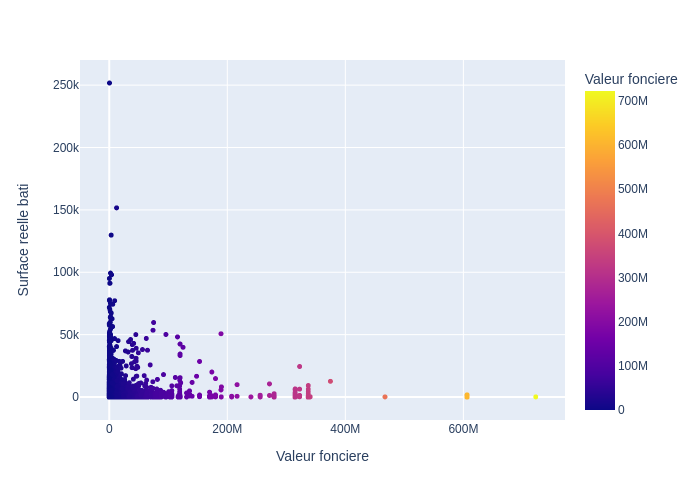

<Figure size 1000x1200 with 0 Axes>

In [21]:
plt.figure(figsize=(10, 12))
fig = px.scatter(outliers_temp, x="Valeur fonciere", y="Surface reelle bati", color="Valeur fonciere", hover_data=['Surface reelle bati'])
fig.update_traces(marker_size=5)

fig.show()

<h3>On utlise la methode Z-Score pour virer des outliers</h3>

In [22]:
z_scores=(data_2022["Valeur fonciere"]-data_2022["Valeur fonciere"].mean())/data_2022["Valeur fonciere"].std()

In [23]:
data_2022_temp=data_2022[abs(z_scores)<=3]

In [24]:
z_scores=(data_2022_temp["Surface reelle bati"]-data_2022_temp["Surface reelle bati"].mean())/data_2022_temp["Surface reelle bati"].std()

In [25]:
data_2022_temp_2=data_2022_temp[abs(z_scores)<=3]

In [26]:
outliers_temp_2 = data_2022_temp_2.loc[:, ['Valeur fonciere', 'Surface reelle bati']]

<h3>Vérification de la répartition après la suppression des outliers</h3>

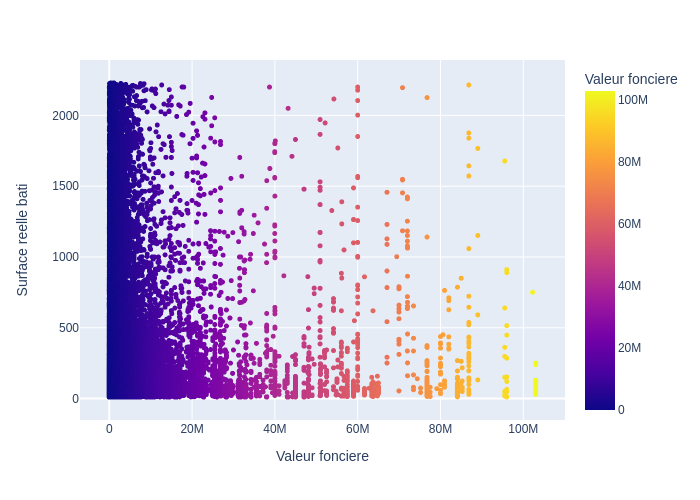

<Figure size 1000x1200 with 0 Axes>

In [27]:
plt.figure(figsize=(10, 12))
fig = px.scatter(outliers_temp_2, x="Valeur fonciere", y="Surface reelle bati", color="Valeur fonciere", hover_data=['Surface reelle bati'])
fig.update_traces(marker_size=5)

fig.show()


In [28]:
data_2022_temp.describe()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Valeur fonciere,...,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Surface terrain
count,1497294.000,1497294.000,1497294.000,1497294.000,1497294.000,1497294.000,1497294.000,1497294.000,1497294,1497294.000,...,1497294.000,1497294.000,1497294.000,1497294.000,1497294.000,1497294.000,1497294.000,1497294.000,1497294.000,1497294.000
mean,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.031,2022-07-04 05:10:58.389334272,776552.465,...,0.950,0.116,0.534,0.049,0.582,1.668,0.000,115.481,3.174,721.509
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2022-01-01 00:00:00,12.500,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,11.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2022-04-08 00:00:00,125000.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,50.000,2.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2022-07-01 00:00:00,210000.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,76.000,3.000,190.000
75%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2022-09-29 00:00:00,356349.375,...,0.000,0.000,0.000,0.000,1.000,2.000,0.000,106.000,4.000,610.000
max,0.000,0.000,0.000,0.000,0.000,0.000,0.000,27.000,2022-12-31 00:00:00,103000000.000,...,221311.000,4765.300,221312.000,1538.000,188.000,4.000,0.000,251725.000,90.000,3760000.000
std,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.198,NaN,4511024.052,...,187.867,6.576,183.884,3.242,1.088,0.856,0.000,704.547,1.817,6464.323


<h4>Données foncières 2020</h4>

In [29]:
data_2020=pd.read_csv("./data/valeursfoncieres-2020.txt", sep="|", decimal=",")

In [30]:
data_2022.columns == data_2020.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [31]:
data_2020.head(5)

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061.000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85.000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115.000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940.000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148.000


In [32]:
data_2020["Date mutation"]=pd.to_datetime(data_2020.loc[:,"Date mutation"], format="%d/%m/%Y")

In [33]:
data_2020.fillna(0, inplace=True)

In [34]:
data_2020.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2020-01-07,Vente,...,0.000,0,0.000,0,0.000,0.000,0.000,T,0,1061.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2020-01-02,Vente,...,0.000,0,0.000,0,0.000,0.000,0.000,BT,0,85.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2020-01-02,Vente,...,0.000,0,0.000,0,0.000,0.000,0.000,T,0,1115.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2020-01-02,Vente,...,0.000,0,0.000,0,0.000,0.000,0.000,T,0,1940.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2020-01-02,Vente,...,0.000,0,0.000,0,0.000,0.000,0.000,T,0,1148.000


In [35]:
data_2020.shape

(3518587, 43)

In [36]:
data_2020["Valeur fonciere"].isna().unique()

array([False])

In [37]:
data_2020["Surface reelle bati"].describe()

count   3518587.000
mean         45.664
std         498.207
min           0.000
25%           0.000
50%           0.000
75%          64.000
max      218290.000
Name: Surface reelle bati, dtype: float64

<h3>Afin de mieux comprendre la répartition de données, on cherche des outliers (surface reelle bati et valeur fonciere)</h3>

In [42]:
outliers_temp = data_2020.loc[:, ['Valeur fonciere', 'Surface reelle bati']]

In [43]:
outliers_temp.describe()

,Valeur fonciere,Surface reelle bati
count,3518587.000,3518587.000
mean,854386.091,45.664
std,7674805.159,498.207
min,0.000,0.000
25%,63000.000,0.000
50%,152550.000,0.000
75%,277250.000,64.000
max,490000000.000,218290.000


<h3>On les trouve selon la methode z-score</h3>

In [44]:
z_scores=(data_2020["Valeur fonciere"]-data_2020["Valeur fonciere"].mean())/data_2020["Valeur fonciere"].std()

In [45]:
data_2020_temp=data_2020[abs(z_scores)<=3]

In [46]:
outliers_temp = data_2020_temp.loc[:, ['Valeur fonciere', 'Surface reelle bati']]

In [47]:
z_scores=(data_2020_temp["Surface reelle bati"]-data_2020_temp["Surface reelle bati"].mean())/data_2020_temp["Surface reelle bati"].std()

In [48]:
data_2020_temp_2=data_2020_temp[abs(z_scores)<=3]

In [49]:
outliers_temp_2 = data_2020_temp_2.loc[:, ['Valeur fonciere', 'Surface reelle bati']]

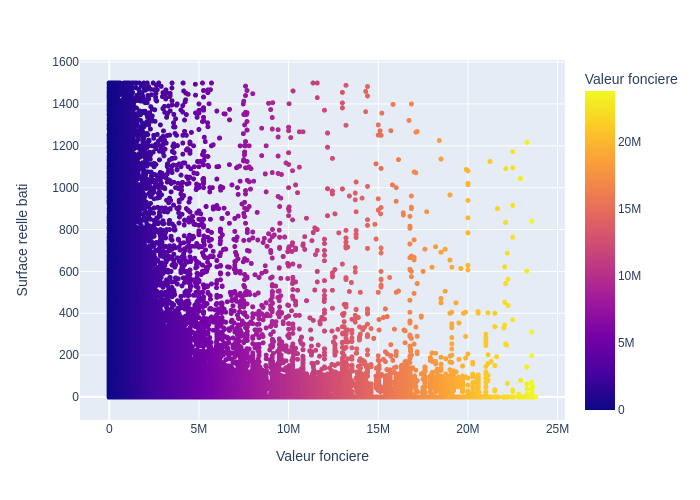

<Figure size 1000x1200 with 0 Axes>

In [50]:
plt.figure(figsize=(10, 12))
fig = px.scatter(outliers_temp_2, x="Valeur fonciere", y="Surface reelle bati", color="Valeur fonciere", hover_data=['Surface reelle bati'])
fig.update_traces(marker_size=5)

fig.show()

-----------------------------------------------------------------------

<h3>A reremplir par des autres participants du projet</h3>

<h3>A reremplir par des autres participants du projet</h3>

<h3>A reremplir par des autres participants du projet</h3>

---------------------------------------------------------

## NEXITY et CAC40 - données sur des actions de la bourse pendant 2020 et 2022

<h2>Préparation de données financières (Bourse : Nexity et CAC40, taux d'intêret)</h2>

<h3>Préparation de données de taux immobilier 2020 et 2022</h3>


<h4>Création d'un dataframe à partir de fichier</h4>

In [51]:
with open('./data/taux.txt', 'r') as file:
    file_content = file.read()

lines = [line.strip() for line in file_content.split('\n') if line.strip()]
lines = [el.split(':') for el in lines]

In [52]:
lines

[['01-2020 ', ' -0,538%'],
 ['02-2020 ', ' -0,538%'],
 ['03-2020 ', ' -0,534%'],
 ['04-2020 ', ' -0,537%'],
 ['05-2020 ', ' -0,542%'],
 ['06-2020 ', ' -0,546%'],
 ['07-2020 ', ' -0,550%'],
 ['08-2020 ', ' -0,553%'],
 ['09-2020 ', ' -0,554%'],
 ['10-2020 ', ' -0,554%'],
 ['11-2020 ', ' -0,556%'],
 ['12-2020 ', ' -0,557%'],
 ['01-2022 ', ' -0,578%'],
 ['02-2022 ', ' -0,577%'],
 ['03-2022 ', ' -0,579%'],
 ['04-2022 ', ' -0,584%'],
 ['05-2022 ', ' -0,585%'],
 ['06-2022 ', ' -0,582%'],
 ['07-2022 ', ' -0,511%'],
 ['08-2022 ', ' -0,085%'],
 ['09-2022 ', ' 0,355%'],
 ['10-2022 ', ' 0,656%'],
 ['11-2022 ', ' 1,368%'],
 ['12-2022 ', ' 1,568%']]

In [53]:
taux_immo = pd.DataFrame(lines, columns=['Period', 'Avg_rate'])

In [54]:
taux_immo['Avg_rate'] = pd.to_numeric(taux_immo['Avg_rate'].str.replace('%', '').str.replace(',', '.').str.strip())

In [55]:
taux_immo['Avg_rate'].dtype

dtype('float64')

In [56]:
taux_immo['Period'] = pd.to_datetime(taux_immo['Period'].str.strip(), format='%m-%Y')

In [57]:
taux_immo

,Period,Avg_rate
0,2020-01-01,-0.538
1,2020-02-01,-0.538
2,2020-03-01,-0.534
3,2020-04-01,-0.537
4,2020-05-01,-0.542
5,2020-06-01,-0.546
6,2020-07-01,-0.550
7,2020-08-01,-0.553
8,2020-09-01,-0.554
9,2020-10-01,-0.554


<h3>Préparation de données Nexity et CAC40 2020-2022</h3>


In [58]:
nexity_data=pd.read_csv("./data/NXI.PA.csv", parse_dates=['Date'])

In [59]:
nexity_data["type"]="nexity"

In [60]:
cac40_data=pd.read_csv("./data/cac40.csv", parse_dates=['Date'])

In [61]:
cac40_data["type"]="cac40"

<h4>Merge de données</h4>

In [62]:
stock_market_data=pd.concat([nexity_data, cac40_data])

<h4>Vérification et gestion de données manquantes</h4>

In [63]:
stock_market_data[pd.isnull(stock_market_data).any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume,type
1283,2023-06-01,NaN,NaN,NaN,NaN,NaN,NaN,nexity


In [64]:
stock_market_data.shape

(2055, 8)

In [65]:
to_exclude=["Date", "type"]

In [66]:
condition=stock_market_data.drop(to_exclude, axis=1).isnull().all(axis=1)

In [67]:
stock_market_data=stock_market_data[~condition]

<h4>Exploration</h4>

In [68]:
stock_market_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
type                 object
dtype: object

<h4>Average per month for 2020 and 2022</h4>

In [69]:
year_1=2022
year_2=2020

<h4>Filtrer des données pour une année en particulier</h4>

In [71]:
stock_market_data.loc[:,"Date"]=pd.to_datetime(stock_market_data.loc[:, "Date"])
stock_market_2022 = stock_market_data[stock_market_data.loc[:, "Date"].dt.year == year_1]

In [72]:
stock_market_2020 = stock_market_data[stock_market_data.loc[:, "Date"].dt.year == year_2]

In [73]:
stock_market_2022['Month'] = stock_market_2022['Date'].dt.month

In [74]:
stock_market_2020['Month'] = stock_market_2020['Date'].dt.month

<h4>Calculate the average of 'Open' and 'Close' per month</h4>

In [75]:
m_avg_2022 = stock_market_2022.groupby(["Month", "type"])[['Open', 'Close']].mean()

In [76]:
m_avg_2020 = stock_market_2020.groupby(["Month", "type"])[['Open', 'Close']].mean()

In [77]:
m_avg_2020.describe()

,Open,Close
count,24.000,24.000
mean,2553.376,2551.801
std,2600.655,2599.542
min,25.691,25.566
25%,29.026,29.248
50%,2242.469,2234.817
75%,4950.229,4959.380
max,5970.370,5955.340


In [78]:
m_avg_2022.describe()

,Open,Close
count,24.000,24.000
mean,3236.696,3236.129
std,3287.342,3286.584
min,19.601,19.502
25%,25.868,25.721
50%,3022.096,3028.013
75%,6450.546,6439.939
max,7132.970,7125.162


<h4>Obtention de nombre de transactions immobilier par mois en 2022</h4>

In [79]:
month_transactions_nb_2022 = data_2022_temp_2.groupby(["Date mutation", "Voie"]).size().to_frame('Count')
month_transactions_nb_2022.reset_index(inplace=True)

In [80]:
nb_trans_2022 = month_transactions_nb_2022.groupby(month_transactions_nb_2022['Date mutation'].dt.to_period("M")).size().reset_index(name='Count')

In [81]:
nb_trans_2022

,Date mutation,Count
0,2022-01,66285
1,2022-02,66901
2,2022-03,79756
3,2022-04,71302
4,2022-05,75951
5,2022-06,87584
6,2022-07,92114
7,2022-08,67719
8,2022-09,84395
9,2022-10,70497


<h4>Obtention de nombre de transactions immobilier par mois en 2020</h4>

In [82]:
month_transactions_nb_2020 = data_2020_temp_2.groupby(["Date mutation", "Voie"]).size().to_frame('Count')
month_transactions_nb_2020.reset_index(inplace=True)

In [83]:
nb_trans_2020 = month_transactions_nb_2020.groupby(month_transactions_nb_2020['Date mutation'].dt.to_period("M")).size().reset_index(name='Count')

In [84]:
nb_trans_2020

,Date mutation,Count
0,2020-01,115391
1,2020-02,115016
2,2020-03,83974
3,2020-04,49140
4,2020-05,108711
5,2020-06,130206
6,2020-07,124924
7,2020-08,91970
8,2020-09,138219
9,2020-10,147142


<h2>Comparaison nombres de transactions par mois - période covid et post-covid</h2>

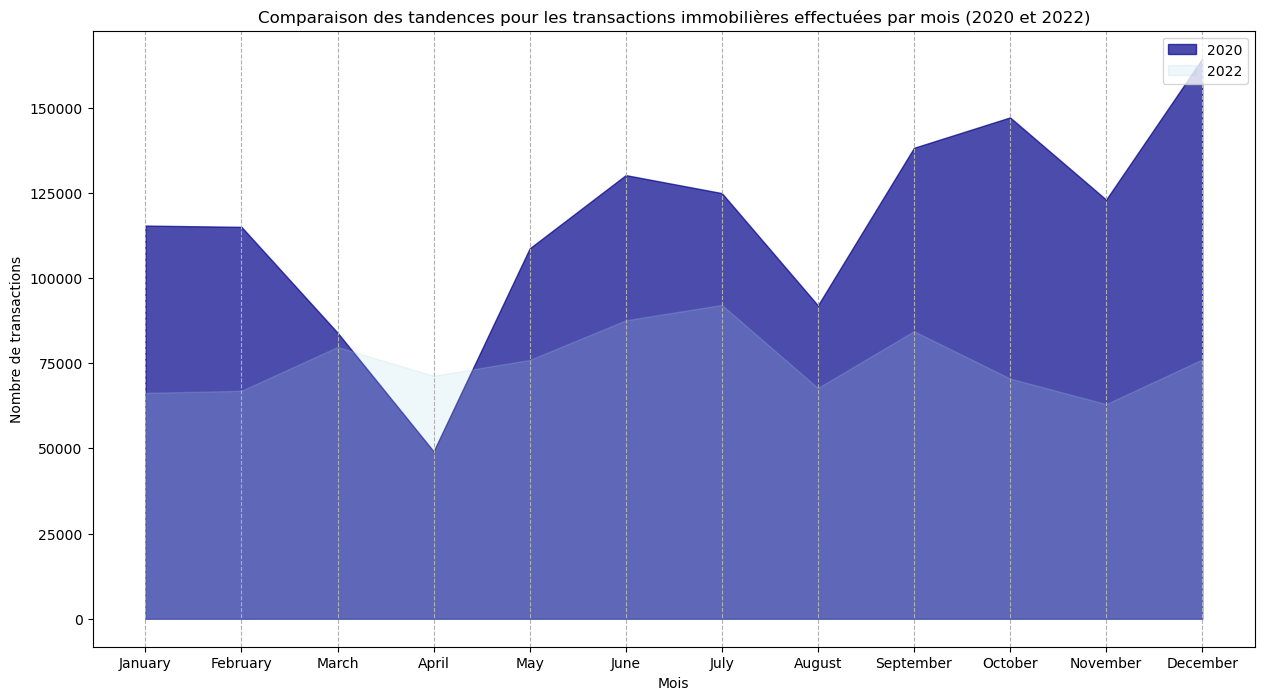

In [85]:
fig, ax = plt.subplots(figsize=(15, 8))

plt.fill_between(nb_trans_2020["Date mutation"].dt.strftime('%B'), nb_trans_2020['Count'], label='2020', alpha=0.7, color="darkblue")
plt.fill_between(nb_trans_2022["Date mutation"].dt.strftime('%B'), nb_trans_2022['Count'], label='2022', alpha=0.2, color="lightblue")

plt.grid(axis='x', linestyle='--', alpha=1)

plt.xlabel('Mois')
plt.ylabel('Nombre de transactions')
plt.title('Comparaison des tandences pour les transactions immobilières effectuées par mois (2020 et 2022)')

plt.legend()
plt.show()


<h2>Le taux à court terme de la zone euro (ESTER) - 2020 vs 2022</h2>


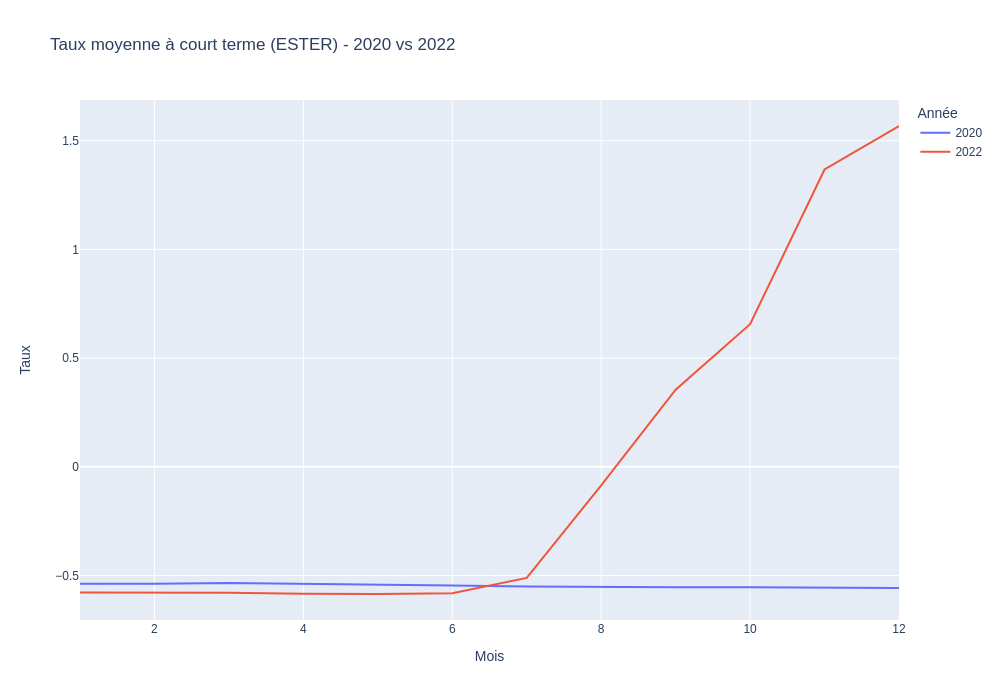

In [86]:
taux_immo['Year'] = taux_immo['Period'].dt.year
taux_immo['Month'] = taux_immo['Period'].dt.month

monthly_avg = taux_immo.groupby(['Year', 'Month'])['Avg_rate'].mean().reset_index()

fig = px.line(monthly_avg, x='Month', y='Avg_rate', color='Year',
              labels={'Avg_rate': 'Taux', 'Month': 'Mois'},
              title='Taux moyenne à court terme (ESTER) - 2020 vs 2022',
              line_group='Year', render_mode='svg')

fig.update_layout(xaxis_title='Mois',
                  yaxis_title='Taux',
                  legend_title='Année',
                 height=700,
                 width=1000)

fig.show()



<h2>Saisonnalité des transactions (2022 vs 2020)</h2>


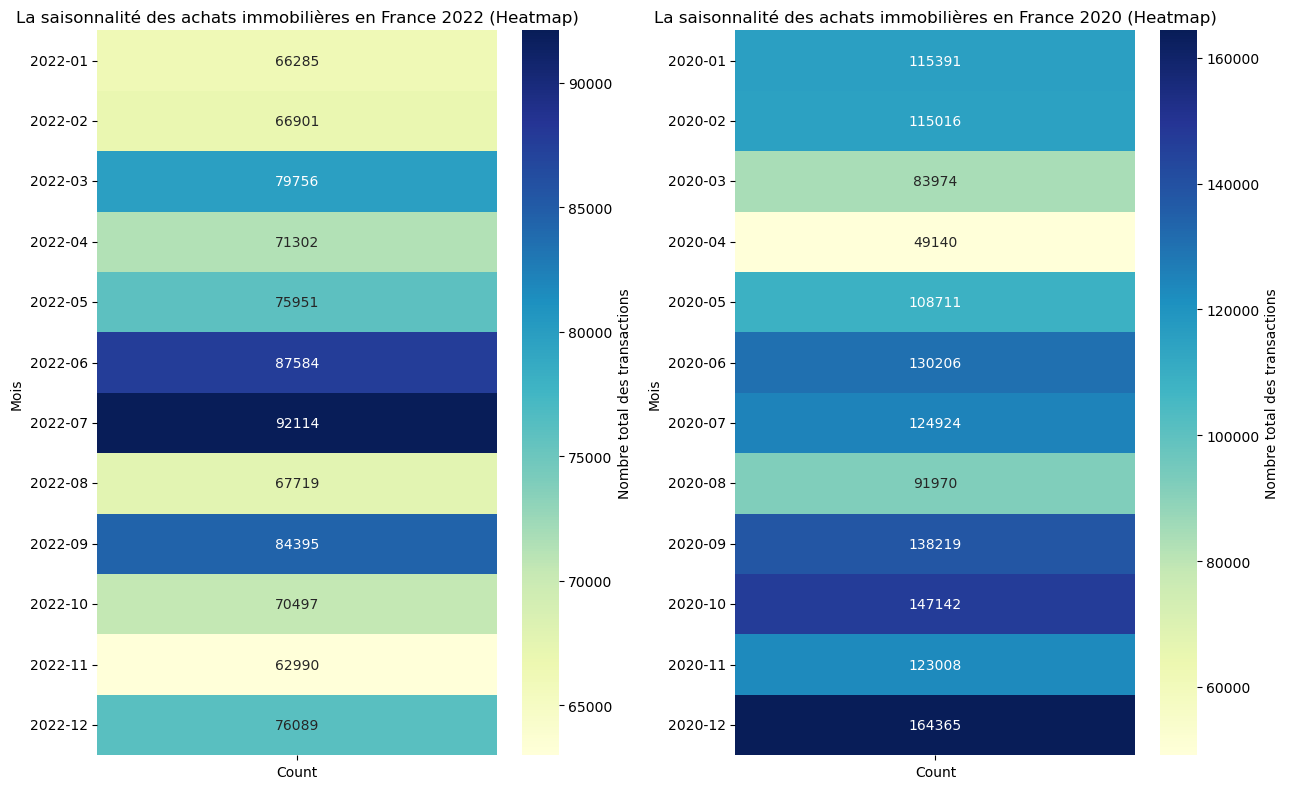

In [87]:
nb_trans_2022['Date mutation'] = nb_trans_2022['Date mutation'].astype(str)


nb_trans_2022['Date mutation'] = nb_trans_2022['Date mutation'].astype(str)
nb_trans_2020['Date mutation'] = nb_trans_2020['Date mutation'].astype(str)

heatmap_data_2022 = nb_trans_2022.pivot_table(index='Date mutation', values='Count', aggfunc='sum')
heatmap_data_2020 = nb_trans_2020.pivot_table(index='Date mutation', values='Count', aggfunc='sum')

fig, axes = plt.subplots(1, 2, figsize=(13, 8))

sns.heatmap(heatmap_data_2022, cmap='YlGnBu', annot=True, fmt='.0f', cbar_kws={'label': 'Nombre total des transactions'}, ax=axes[0])
axes[0].set_title('La saisonnalité des achats immobilières en France 2022 (Heatmap)')
axes[0].set_ylabel('Mois')

sns.heatmap(heatmap_data_2020, cmap='YlGnBu', annot=True, fmt='.0f', cbar_kws={'label': 'Nombre total des transactions'}, ax=axes[1])
axes[1].set_title('La saisonnalité des achats immobilières en France 2020 (Heatmap)')
axes[1].set_ylabel('Mois')

plt.tight_layout()
plt.show()

<h2>Tandance pour le choix entre une maison et un appartement -2020-2022</h2>


In [88]:
immob_2020_type=data_2020_temp_2.dropna(subset=['Type local'])
immob_2022_type=data_2022_temp_2.dropna(subset=['Type local'])

In [89]:
immob_2020_type["Date mutation"] = pd.to_datetime(immob_2020_type["Date mutation"], format='%d/%m/%Y')
immob_2022_type["Date mutation"] = pd.to_datetime(immob_2022_type["Date mutation"], format='%d/%m/%Y')

In [90]:
immob_2020_type.set_index("Date mutation", inplace=True)
immob_2022_type.set_index("Date mutation", inplace=True)

In [91]:
count_per_month_type_2020 = immob_2020_type.groupby([immob_2020_type.index.month, 'Type local']).size().unstack().reset_index()

In [92]:
count_per_month_type_2022 = immob_2022_type.groupby([immob_2022_type.index.month, 'Type local']).size().unstack().reset_index()

In [93]:
count_per_month_type_2022

Type local,Date mutation,Appartement,Local industriel. commercial ou assimilé,Maison
0,1,43678,8304,54213
1,2,45144,8877,54868
2,3,54996,11506,64386
3,4,49183,10171,58313
4,5,53479,10334,61340
5,6,65470,12462,72799
6,7,60646,12064,83078
7,8,39516,6328,59699
8,9,59322,10936,69738
9,10,45605,9477,59201


In [94]:
count_per_month_type_2020

Type local,Date mutation,0,Appartement,Dépendance,Local industriel. commercial ou assimilé,Maison
0,1,122068,47733,38070,9858,53920
1,2,124212,47895,37703,9838,53197
2,3,91529,34921,27452,8278,38179
3,4,47633,19035,15212,4424,24094
4,5,107540,49173,41105,7937,59053
5,6,147619,57286,51138,11456,61061
6,7,147180,53253,48489,11165,59546
7,8,93700,33273,31860,5404,51036
8,9,143386,55806,54532,11165,75238
9,10,155860,58046,59929,11328,81220


In [95]:
%matplotlib notebook

<IPython.core.display.Javascript object>


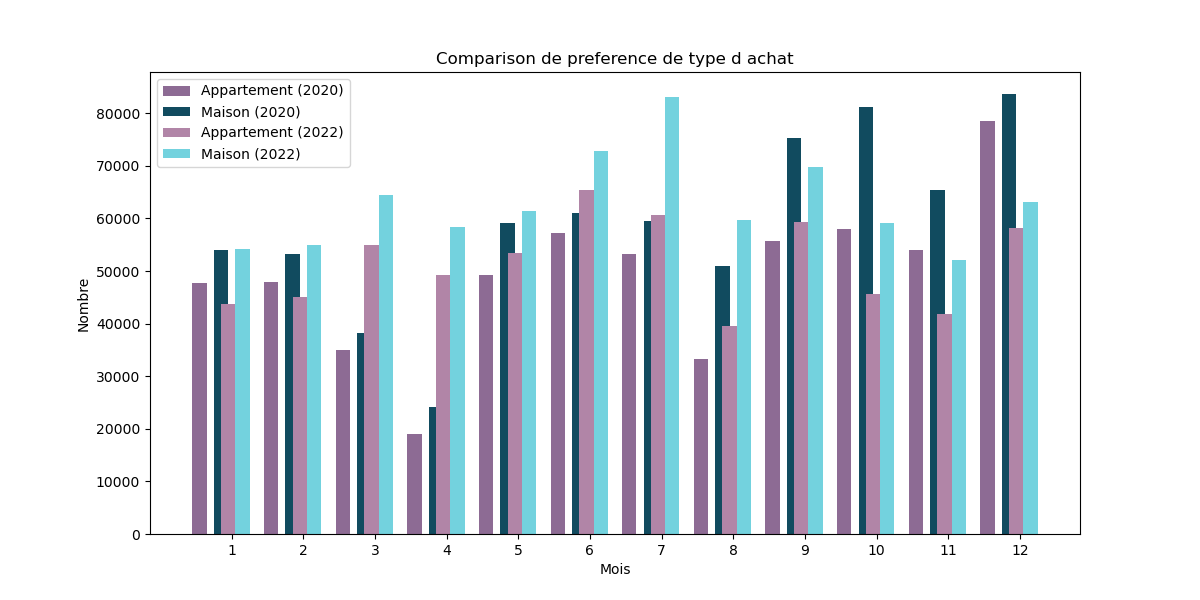

In [96]:
plt.figure(figsize=(12, 6))

bar_width = 0.2
gap_width = 0.1
index = np.arange(len(count_per_month_type_2020['Date mutation']))

# Bars for 2020
plt.bar(index - (bar_width + gap_width), count_per_month_type_2020['Appartement'], bar_width, color="#8d6b94", label='Appartement (2020)')
plt.bar(index, count_per_month_type_2020['Maison'], bar_width, color="#114b5f", label='Maison (2020)')

# Bars for 2022
plt.bar(index + gap_width, count_per_month_type_2022['Appartement'], bar_width, color="#b185a7", label='Appartement (2022)')
plt.bar(index + (bar_width + gap_width), count_per_month_type_2022['Maison'], bar_width, color="#73d2de", label='Maison (2022)')

plt.title('Comparison de preference de type d achat')
plt.xlabel('Mois')
plt.ylabel('Nombre')
plt.legend()
plt.xticks(index + (bar_width + gap_width) / 2, count_per_month_type_2020['Date mutation'])  # Adjust x-ticks to center bars
plt.show()



<h2>Surfaces terrains vendus par departement - 2020 vs 2022</h2>


In [97]:
with open("./data/departements.geojson", 'r') as file:
    geojson = json.load(file)

In [98]:
geo_df=pd.DataFrame({'Code departement':[], 'labels': []})
geo_df=geo_df.astype({"Code departement": 'str', "labels": 'str'})

In [99]:
for i in range(len(geojson['features'])):
    geojson['features'][i]['id'] = i
    geo_df.loc[i, 'Code departement']=geojson['features'][i]['properties']['code']
    geo_df.loc[i, 'labels']=geojson['features'][i]['properties']['nom']

In [100]:
depart_surface_terrain_2020=data_2020_temp_2.loc[:, ["Code departement", "Surface terrain"]]
depart_surface_terrain_2022=data_2022_temp_2.loc[:, ["Code departement", "Surface terrain"]]

In [101]:
depart_surface_terrain_2020=depart_surface_terrain_2020.groupby("Code departement")["Surface terrain"].sum().reset_index()
depart_surface_terrain_2022=depart_surface_terrain_2022.groupby("Code departement")["Surface terrain"].sum().reset_index()

In [102]:
depart_surface_terrain_2020["Code departement"]=depart_surface_terrain_2020["Code departement"].astype(str).str.zfill(width=2)
depart_surface_terrain_2022["Code departement"]=depart_surface_terrain_2022["Code departement"].astype(str).str.zfill(width=2)

In [103]:
depart_surface_terrain_2020 = pd.merge(geo_df, depart_surface_terrain_2020, on='Code departement', how='inner')
depart_surface_terrain_2022 = pd.merge(geo_df, depart_surface_terrain_2022, on='Code departement', how='inner')

In [104]:
top3_2020 = depart_surface_terrain_2020.nlargest(3, 'Surface terrain')
bottom3_2020 = depart_surface_terrain_2020.nsmallest(3, 'Surface terrain').sort_values(by='Surface terrain', ascending=True)

In [105]:
top3_2022 = depart_surface_terrain_2022.nlargest(3, 'Surface terrain')
bottom3_2022 = depart_surface_terrain_2022.nsmallest(3, 'Surface terrain').sort_values(by='Surface terrain', ascending=True)

<h4>2022</h4>

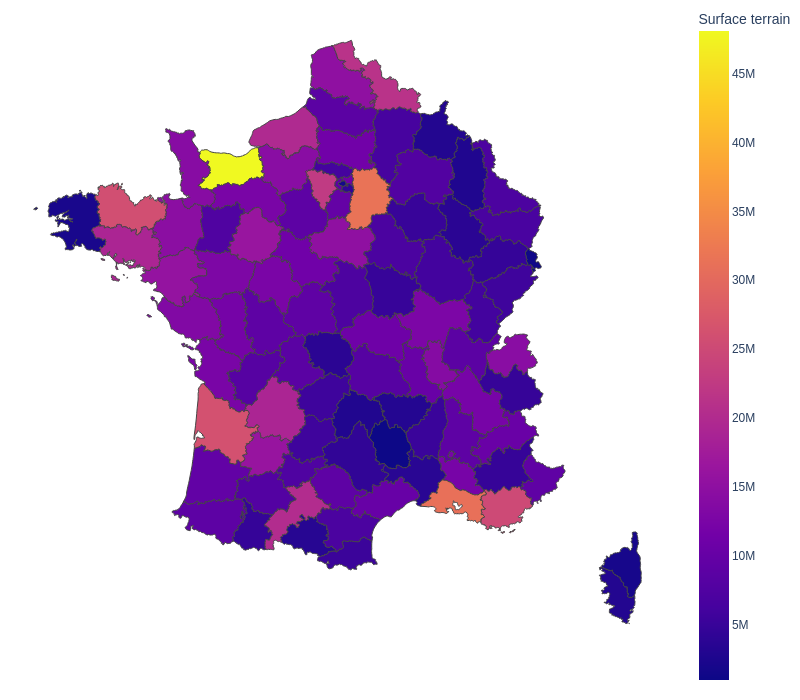

In [106]:
fig = px.choropleth(depart_surface_terrain_2022, geojson=geojson, color="Surface terrain",
                    locations="Code departement", featureidkey="properties.code",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)

fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 10},
    width=800,
    height=700
)

fig.show()

<h4>2020</h4>

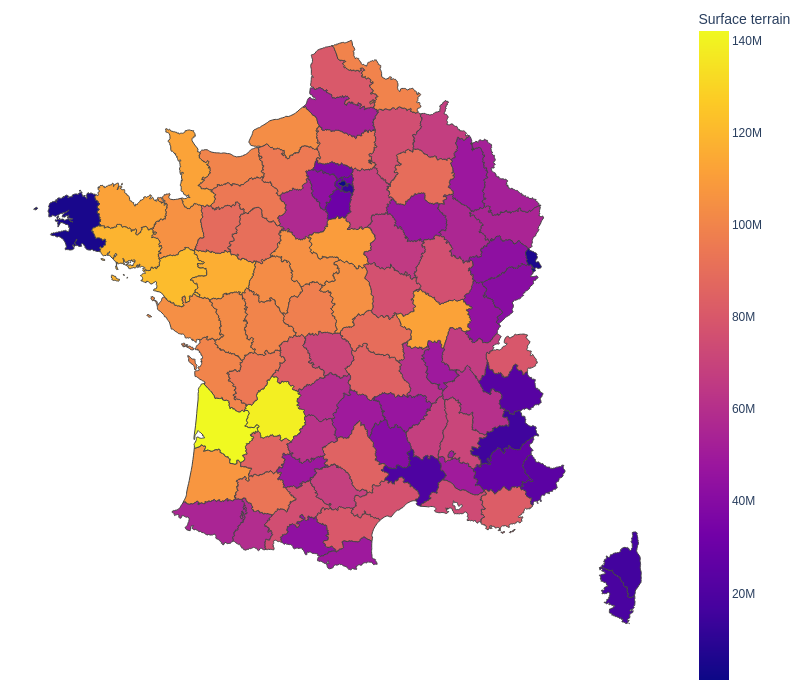

In [107]:
fig = px.choropleth(depart_surface_terrain_2020, geojson=geojson, color="Surface terrain",
                    locations="Code departement", featureidkey="properties.code",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)

fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 10},
    width=800,
    height=700
)

fig.show()

In [108]:
top_bottom_2022=pd.concat([top3_2022, bottom3_2022], axis=0)
top_bottom_2020=pd.concat([top3_2020, bottom3_2020], axis=0)

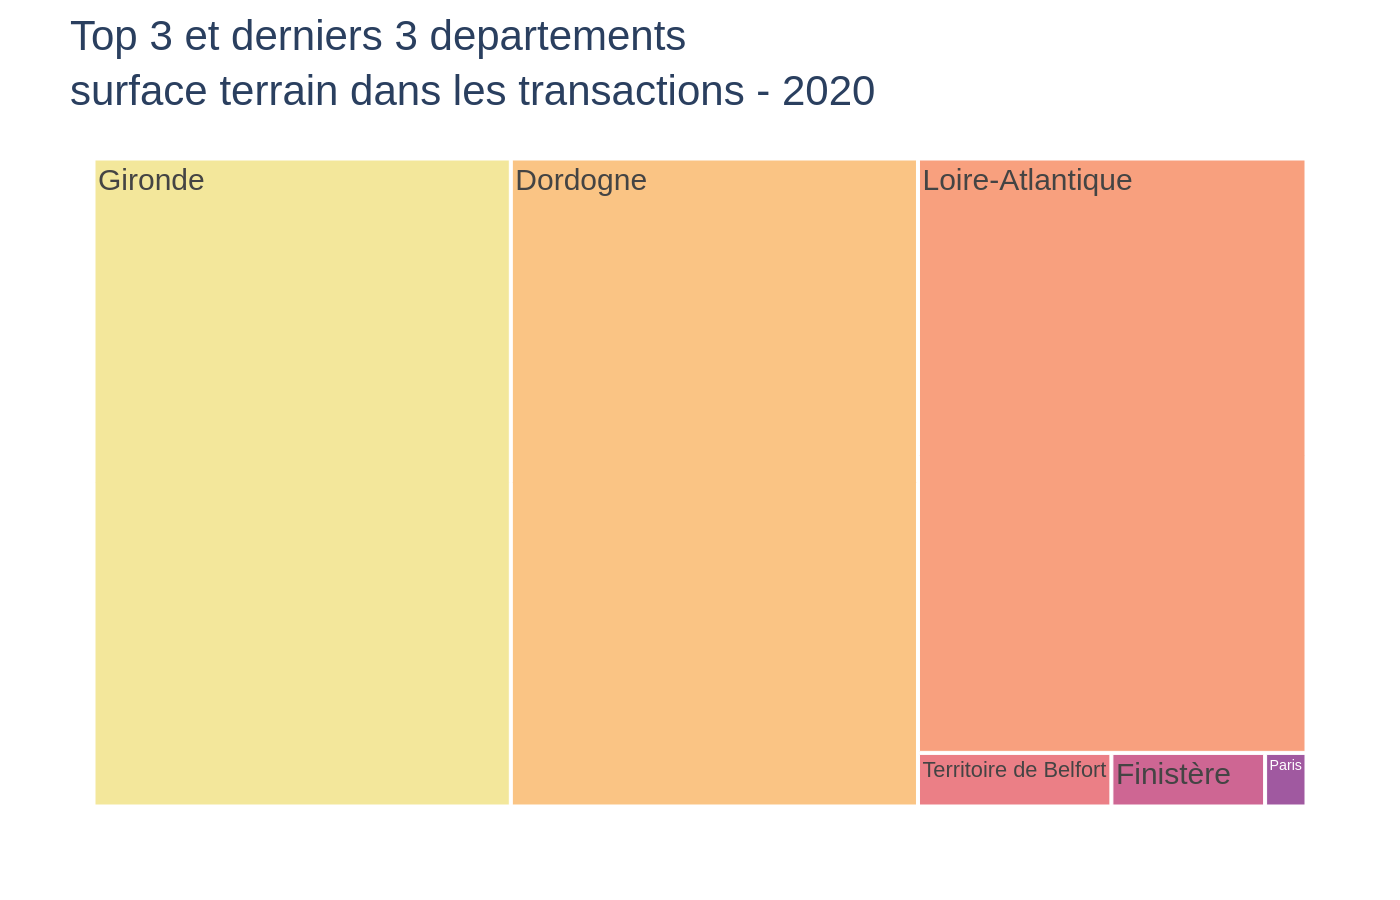

In [109]:
custom_colors=px.colors.sequential.Sunset

fig=px.treemap(top_bottom_2020, path=['labels'], values='Surface terrain',
                 title='''
                 Top 3 et derniers 3 departements<br>surface terrain dans les transactions - 2020
                 ''',
                 color_discrete_sequence=custom_colors,
                 width=1400, height=900)

fig.update_layout(font=dict(size=30))

fig.show()

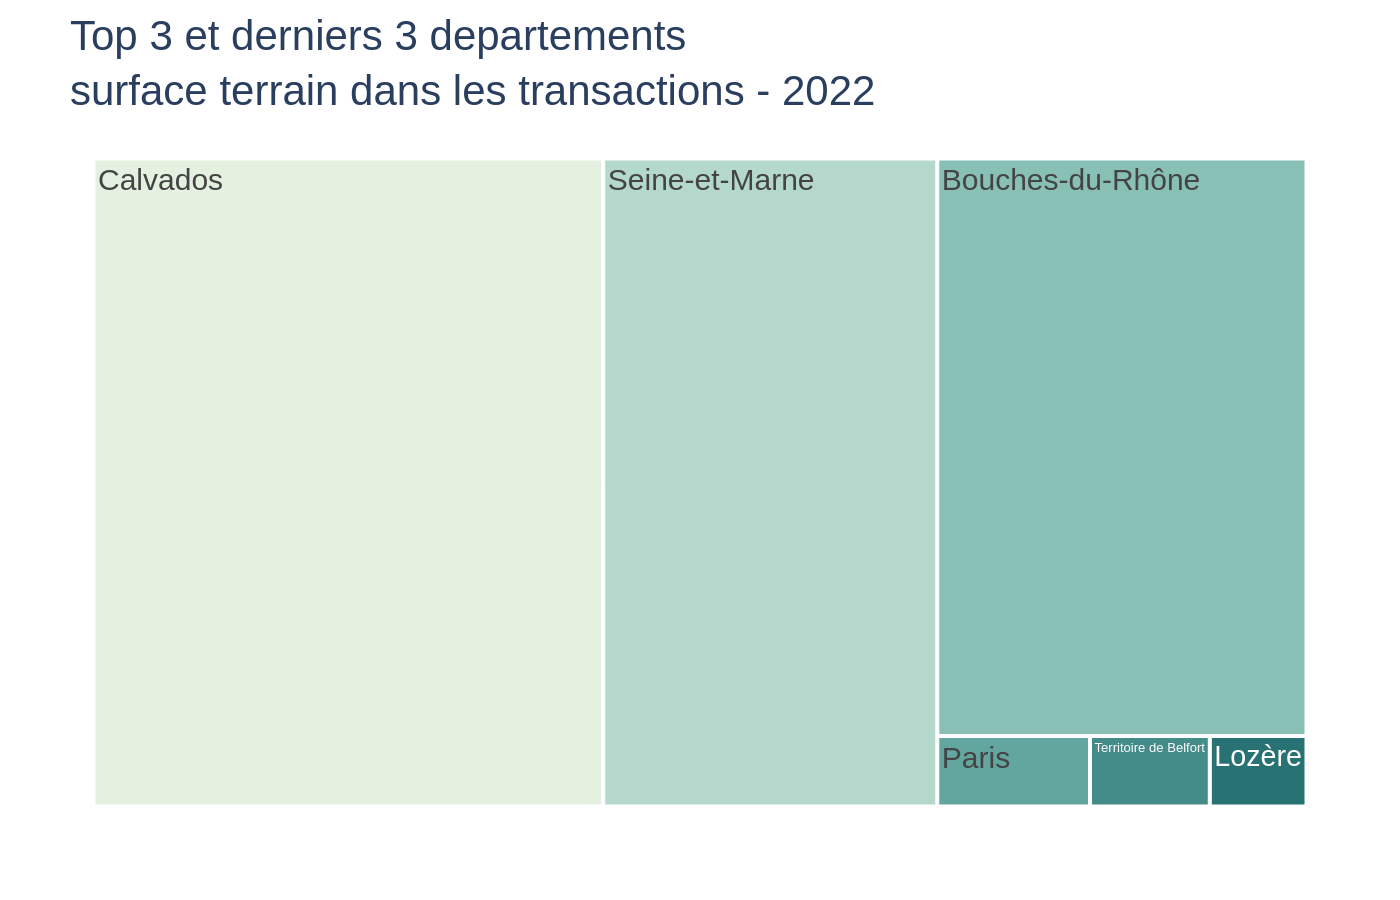

In [110]:
custom_colors=px.colors.sequential.Mint

fig=px.treemap(top_bottom_2022, path=['labels'], values='Surface terrain',
                 title='''
                 Top 3 et derniers 3 departements<br>surface terrain dans les transactions - 2022
                 ''',
                 color_discrete_sequence=custom_colors,
                 width=1400, height=900)

fig.update_layout(font=dict(size=30))

fig.show()

<h2>Répartition de la surface terrain vendu dans le departement 14 (Calvados)<br> Top 10 communes</h2>

In [111]:
columns=["Code departement","Code commune", "Commune", "Surface terrain"]
surface_terrain_commune = data_2022_temp_2.loc[data_2022_temp_2["Code departement"] == 14, columns]

In [112]:
communes = surface_terrain_commune[surface_terrain_commune["Code departement"] == 14].groupby("Code commune")["Commune"].first().reset_index()

In [113]:
surface_terrain_commune=surface_terrain_commune[surface_terrain_commune["Code departement"] == 14].groupby("Code commune")["Surface terrain"].sum().reset_index()

In [114]:
surface_terrain_commune = pd.merge(surface_terrain_commune, communes, on='Code commune', how='inner')

In [115]:
surface_terrain_commune

,Code commune,Surface terrain,Commune
0,1,37093.000,ABLON
1,3,1156.000,AGY
2,5,27278.000,VALAMBRAY
3,6,11903.000,AMAYE-SUR-ORNE
4,7,15165.000,AMAYE SUR SEULLES
...,...,...,...
507,759,2559.000,VILLY-LEZ-FALAISE
508,760,10580.000,VILLY-BOCAGE
509,761,7633.000,VIMONT
510,762,395876.000,VIRE NORMANDIE


In [116]:
surface_terrain_commune['Surface terrain_ha'] = surface_terrain_commune['Surface terrain'] / 10_000

In [117]:
top10 = surface_terrain_commune.sort_values(by='Surface terrain_ha', ascending=False)

In [118]:
top10=top10.head(10)

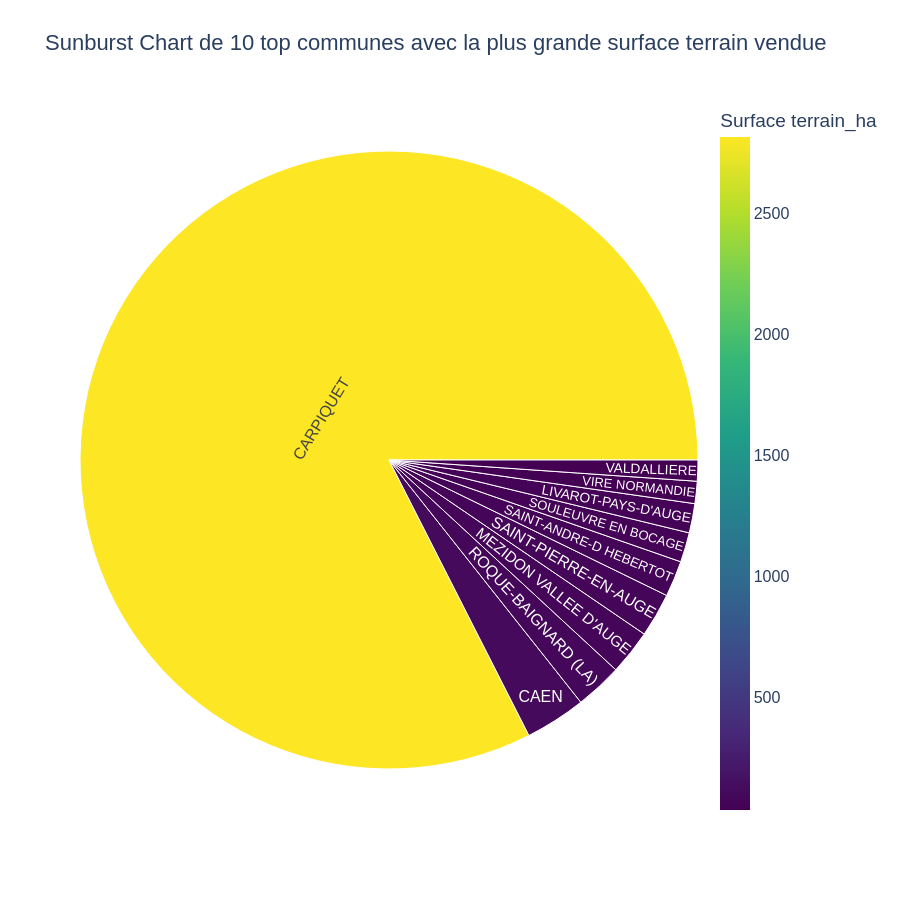

In [119]:
fig = px.sunburst(top10, path=['Commune'],
                  values='Surface terrain',
                  title='Sunburst Chart de 10 top communes avec la plus grande surface terrain vendue',
                  color='Surface terrain_ha',
                  hover_data=['Code commune'],
                  color_continuous_scale='Viridis',
                  width=900, height=900)

fig.update_layout(font=dict(size=16))

fig.show()

<h2>Condition économique à travers des données de la bourse en 2020 et 2022</h2>

<h3>NEXITY en comparaison avec CAC40</h3>

In [120]:
stock_market_2020['Normalized_Open'] = stock_market_2020.groupby('type')['Open'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

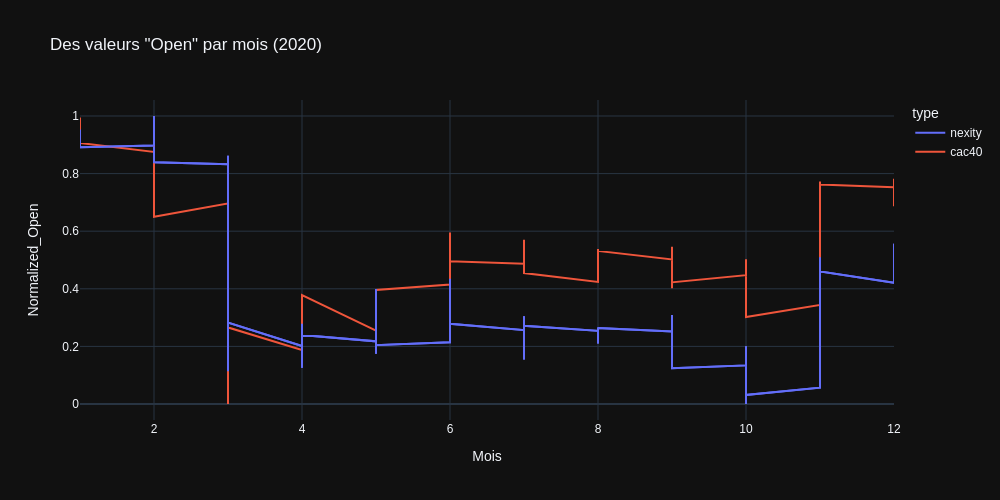

In [121]:
fig = px.line(stock_market_2020, x='Month', y='Normalized_Open', color='type', line_group='type',
              labels={'Open': 'Open Value', 'Month': 'Mois'},
              title='Des valeurs "Open" par mois (2020)',
              template='plotly_dark')

fig.add_trace(px.line(stock_market_2020[stock_market_2020['type'] == 'nexity'], x='Month', y='Normalized_Open',
                      labels={'Open': 'Normalized Nexity Open Value'}).data[0])
fig.update_layout(height=500, width=1000) 

fig.show()